In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import add_dummy_feature

In [43]:
#create dataset

np.random.seed(42)  
m = 1000 
X = 2 * np.random.rand(m, 1)  
y = 4 + 3 * X + np.random.randn(m, 1) 

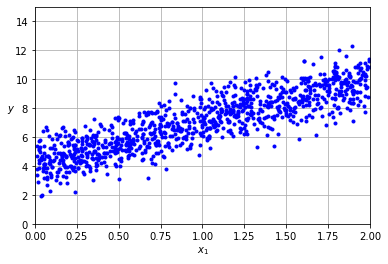

In [44]:
#plot dataset

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()

plt.show()

## Gradient Descent:

In [45]:
def gd_regressor(X, y, learning_rate=0.002, n_epochs=100):
    m = len(X)
    theta=np.zeros((2,1))
    #theta = np.random.randn(2, 1)
    theta_path_gd = []  
    loss_path_gd = []  
    #X_b = np.c_[np.ones((m, 1)), X]  #add a bias term to each instance
    X_b = add_dummy_feature(X)
    for epoch in range(n_epochs):
        for i in range(m):
            gradients = X_b.T.dot(X_b.dot(theta) - y)/m
            theta = theta - learning_rate * gradients

            theta_path_gd.append(theta.copy())  #copy theta to avoid modifying the original array
        loss = np.mean((X_b.dot(theta) - y) ** 2)
        loss_path_gd.append(loss)

    return theta, theta_path_gd, loss_path_gd

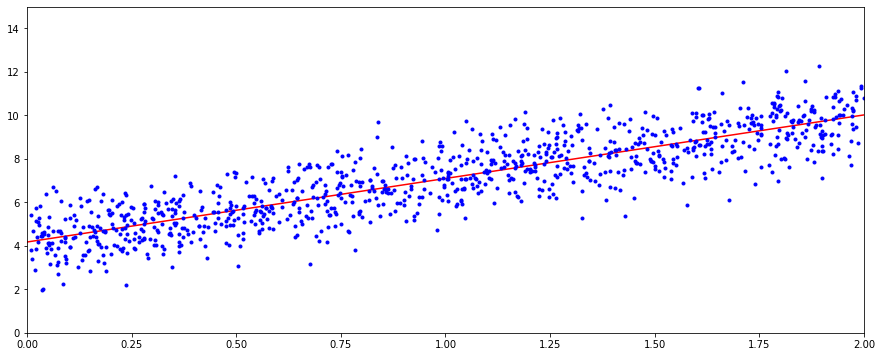

In [46]:
theta_gd, theta_path_gd, loss_path_gd = gd_regressor(X, y)
#call gd_regressor:
theta_gd, _, _ = gd_regressor(X, y)

#predict:
x_new = np.array([[0], [2]])
x_new_b = np.c_[np.ones((2, 1)), x_new]
y_predict = x_new_b.dot(theta_gd)

#plot graph:
plt.figure(figsize=(15, 6))
plt.plot(x_new, y_predict, 'r-')  #predicted line
plt.plot(X, y, 'b.')  #original data points
plt.axis([0, 2, 0, 15])
plt.show()

No handles with labels found to put in legend.


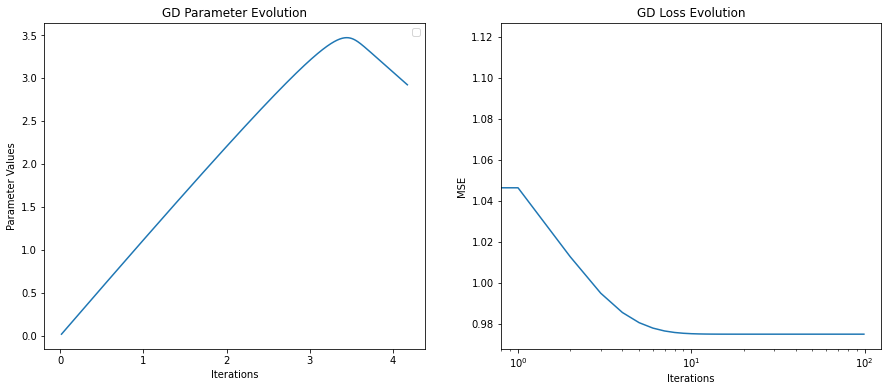

In [47]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)

theta_0_values = [theta[0, 0] for theta in theta_path_gd]
theta_1_values = [theta[1, 0] for theta in theta_path_gd]

plt.plot(theta_0_values, theta_1_values)


#plot parameter evolution
plt.title('GD Parameter Evolution')
plt.xlabel('Iterations')
plt.ylabel('Parameter Values')
plt.legend()

#plot loss evolution
plt.subplot(1, 2, 2)
plt.plot(loss_path_gd)
plt.title('GD Loss Evolution')
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.xscale("log")
plt.show()

[0.89119973 0.89126766 0.89133568 ... 1.42844374 1.42844374 1.42844374]


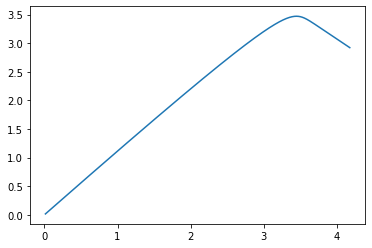

In [48]:
a=np.array(theta_0_values)/np.array(theta_1_values)
print(a)
plt.plot(theta_0_values,theta_1_values)

## Mini-Batch Gradient Descent

In [49]:
def minibatch_regressor(X, y, learning_rate=0.002, n_epochs=100, batch_size=10):
    m = len(X)
    #X_b = np.c_[np.ones((m, 1)), X]
    X_b = add_dummy_feature(X)
    theta=np.zeros((2,1))
    #theta = np.random.randn(2, 1)
    num_batches = int(m / batch_size)

    theta_path_minibatch = [] 
    loss_path_minibatch = []   

    for epoch in range(n_epochs):
        for _ in range(num_batches):
            random_index = np.random.randint(m - batch_size)  
            xi_batch = X_b[random_index:random_index + batch_size]
            yi_batch = y[random_index:random_index + batch_size]

            gradients = 2 * xi_batch.T.dot(xi_batch.dot(theta) - yi_batch) / batch_size
            theta = theta - learning_rate * gradients

            # Keep track of the evolution of theta and loss
        theta_path_minibatch.append(theta.copy())
        loss = np.mean((X_b.dot(theta) - y) ** 2)
        
        loss_path_minibatch.append(loss)

    return theta, theta_path_minibatch, loss_path_minibatch

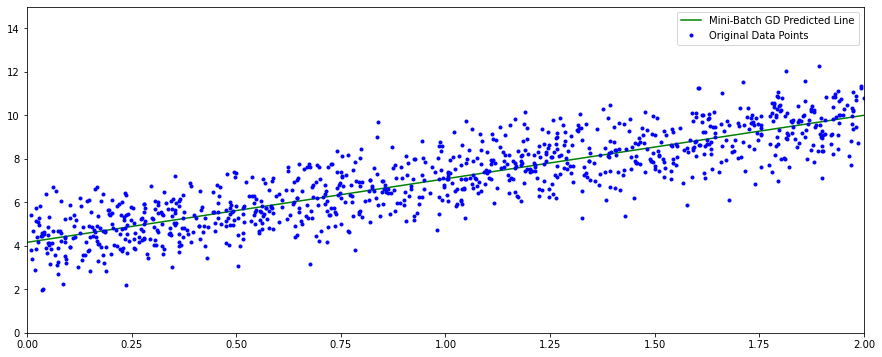

In [50]:
#mini-batch GD:
theta_minibatch, _, _ = minibatch_regressor(X, y)

#plot:
plt.figure(figsize=(15, 6))
x_new = np.array([[0], [2]])
x_new_b = np.c_[np.ones((2, 1)), x_new]

#predicted line&original data 
y_predict_minibatch = x_new_b.dot(theta_minibatch)
plt.plot(x_new, y_predict_minibatch, 'g-', label='Mini-Batch GD Predicted Line')
plt.plot(X, y, 'b.', label='Original Data Points')
plt.axis([0, 2, 0, 15])
plt.legend()
plt.show()

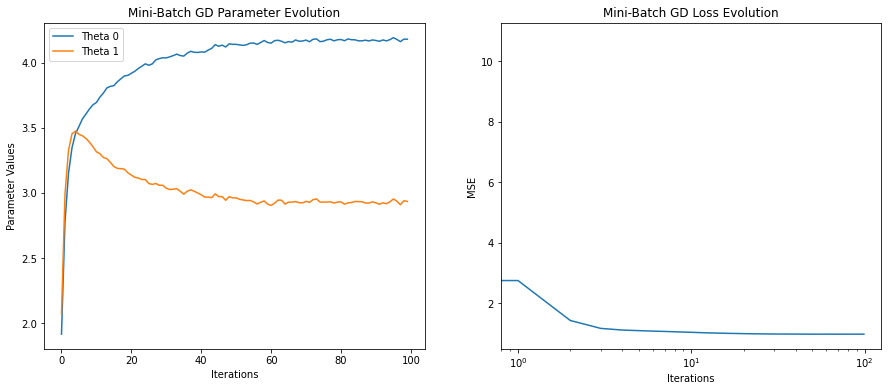

In [51]:
#call minibatch_regressor:
theta_minibatch, theta_path_minibatch, loss_path_minibatch = minibatch_regressor(X, y)

#plot parameter evolution
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)

#extract individual parameter
theta_0_values = [theta[0, 0] for theta in theta_path_minibatch]
theta_1_values = [theta[1, 0] for theta in theta_path_minibatch]

plt.plot(theta_0_values, label='Theta 0')
plt.plot(theta_1_values, label='Theta 1')

plt.title('Mini-Batch GD Parameter Evolution')
plt.xlabel('Iterations')
plt.ylabel('Parameter Values')
plt.legend()

#plot loss evolution
plt.subplot(1, 2, 2)
plt.plot(loss_path_minibatch)
plt.title('Mini-Batch GD Loss Evolution')
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.xscale("log")
plt.show()

## Stochastic Gradient Descent:

In [52]:
def sgd_regressor(X, y, lr=0.002, n_epochs=100):
    
    m = len(X)
    theta=np.zeros((2,1))
    #theta = np.random.randn(2,1)
    theta_path_sgd = [] 
    loss_path_sgd = []

    X_b = add_dummy_feature(X)  # add b to each instance

    for epoch in range(n_epochs):
        
        for i in range(m):
            
            random_index = np.random.randint(m)
            xi = X_b[random_index:random_index+1]
            yi = y[random_index:random_index+1]

            gradients = 2*xi.T.dot(xi.dot(theta)-yi)
            theta = theta - lr * gradients 
            theta_path_sgd.append(theta)
    
        loss = np.mean(np.square(X_b.dot(theta)-y))
        loss_path_sgd.append(loss)

    return theta, theta_path_sgd, loss_path_sgd

In [53]:
sgd_theta, theta_path_sgd,loss_path_sgd = sgd_regressor(X,y)
print(sgd_theta)

[[4.22144237]
 [3.04052632]]


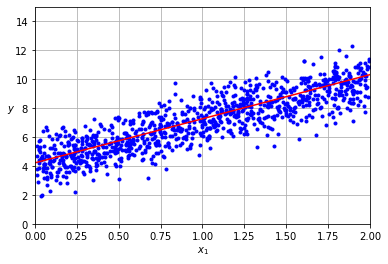

In [54]:
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)  # add x0 = 1 to each instance

y_predict = X_new_b @ sgd_theta

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.plot(X_new, y_predict, "r-", label="SGD_Predictions")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()

plt.show()

## Adam

In [55]:
def adam_regressor(X, y, learning_rate=0.002, beta1=0.9, beta2=0.99, epsilon=1e-4, n_epochs=100):
    m = len(X)
    
    #theta = np.random.randn(2, 1)
    theta=np.zeros((2,1))
    m_t = np.zeros_like(theta)
    v_t = np.zeros_like(theta)
    t = 0
    
    theta_path_adam = [] 
    loss_path_adam = []

    X_b = add_dummy_feature(X)  # add b to each instance

    for epoch in range(n_epochs):
        for i in range(m):
            t += 1
            random_index = np.random.randint(m)
            xi = X_b[random_index:random_index + 1]
            yi = y[random_index:random_index + 1]

            gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
            m_t = beta1 * m_t + (1 - beta1) * gradients
            v_t = beta2 * v_t + (1 - beta2) * (gradients ** 2)

            m_t_hat = m_t / (1 - beta1 ** t)
            v_t_hat = v_t / (1 - beta2 ** t)

            theta = theta - learning_rate * m_t_hat / (np.sqrt(v_t_hat) + epsilon)
            
            theta_path_adam.append(theta)
        
        loss = np.mean(np.square(X_b.dot(theta)-y))
        loss_path_adam.append(loss)
    return theta, theta_path_adam, loss_path_adam

In [56]:
adam_theta, theta_path_adam,loss_path_adam = adam_regressor(X,y)
print(adam_theta)

[[4.19753888]
 [2.94490898]]


In [67]:
np.shape(theta_path_adam)

(100000, 2, 1)

## Error Path

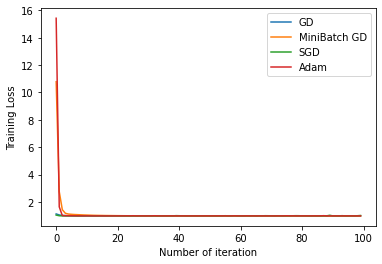

In [57]:
# for 3 gd+adam:
plt.plot(loss_path_gd, label = 'GD')
plt.plot(loss_path_minibatch, label = 'MiniBatch GD')
plt.plot(loss_path_sgd, label = 'SGD')
plt.plot(loss_path_adam, label = 'Adam')
#plt.plot(loss_path_adam, label = 'Adam')

#plt.ylim(0.95,1.3)

plt.xlabel('Number of iteration')
plt.ylabel('Training Loss')
plt.legend()
plt.show()

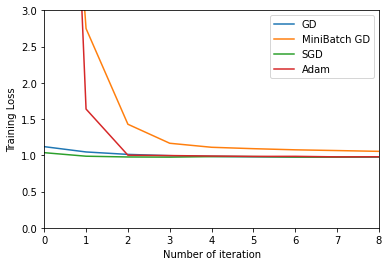

In [58]:
# for 3 gd+adam:
plt.plot(loss_path_gd, label = 'GD')
plt.plot(loss_path_minibatch, label = 'MiniBatch GD')
plt.plot(loss_path_sgd, label = 'SGD')
plt.plot(loss_path_adam, label = 'Adam')
#plt.plot(loss_path_adam, label = 'Adam')
plt.xlim(0,8)
plt.ylim(0,3)

plt.xlabel('Number of iteration')
plt.ylabel('Training Loss')
plt.legend()
plt.show()

In [59]:
#sgd_theta, theta_path_sgd,loss_path_sgd = sgd_regressor(X,y,n_epochs=100)
#adam_theta, theta_path_adam,loss_path_adam = adam_regressor(X,y)

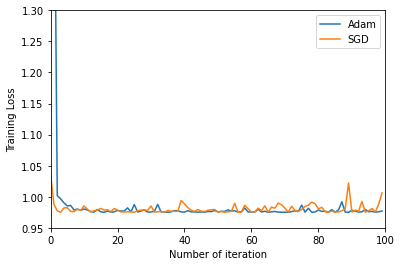

In [60]:
#Error path
plt.plot(loss_path_adam, label = 'Adam')
plt.plot(loss_path_sgd, label = 'SGD')

plt.ylim(0.95,1.3)
plt.xlim(0,100)

plt.xlabel('Number of iteration')
plt.ylabel('Training Loss')
plt.legend()
plt.show()

## Path

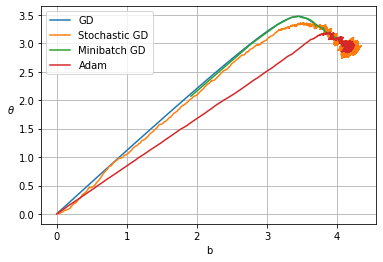

In [70]:
from math import ceil
theta_path_gd=np.array(theta_path_gd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_minibatch=np.array(theta_path_minibatch)

#plt.figure(figsize=(7, 4))

plt.plot(theta_path_gd[:, 0], theta_path_gd[:, 1],label="GD")
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1],label="Stochastic GD")
plt.plot(theta_path_minibatch[:, 0], theta_path_minibatch[:, 1], label="Minibatch GD")
plt.plot(np.array(theta_path_adam)[:, 0], np.array(theta_path_adam)[:, 1], label="Adam")

#plt.xlim(3,4)
#plt.ylim(2.5,4)
plt.legend(loc="upper left")
plt.xlabel("b")
plt.ylabel(r"$\theta$   ", rotation=0)
#plt.axis([2.6, 5, 2.3, 4])
plt.grid()

plt.show()

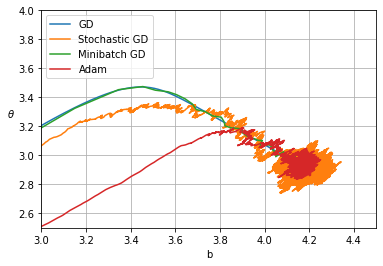

In [73]:
plt.plot(theta_path_gd[:, 0], theta_path_gd[:, 1],label="GD")
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1],label="Stochastic GD")
plt.plot(theta_path_minibatch[:, 0], theta_path_minibatch[:, 1], label="Minibatch GD")
plt.plot(np.array(theta_path_adam)[:, 0], np.array(theta_path_adam)[:, 1], label="Adam")

plt.xlim(3,4.5)
plt.ylim(2.5,4)
plt.legend(loc="upper left")
plt.xlabel("b")
plt.ylabel(r"$\theta$   ", rotation=0)
#plt.axis([2.6, 5, 2.3, 4])
plt.grid()

plt.show()